In [127]:
import nsepy as ns # to import NSE information module
import pandas as pd # import pandas - data processing
import datetime as dt # import datetime - for date time processing
import matplotlib.pyplot as plt # import seaborn and matplotlib - data visualization libraries
import seaborn as sns
import numpy as np # linear algebra
import pmdarima as pm # to import ARIMA MODULE
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks", context="talk")
plt.style.use('default')

In [128]:
nifty = ns.get_history(symbol='NIFTY 50',start =dt.date(2018,1,1),end = dt.date.today(),index=True)

In [129]:
nifty # Details of NIFTY50

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2018-01-01,10531.70,10537.85,10423.10,10435.55,134532090,7.546560e+10
2018-01-02,10477.55,10495.20,10404.65,10442.20,158092430,8.665470e+10
2018-01-03,10482.65,10503.60,10429.55,10443.20,172516859,9.541600e+10
2018-01-04,10469.40,10513.00,10441.45,10504.80,180257392,9.561950e+10
2018-01-05,10534.25,10566.10,10520.10,10558.85,186469717,1.030622e+11
...,...,...,...,...,...,...
2021-12-20,16824.25,16840.10,16410.20,16614.20,330614079,2.512359e+11
2021-12-21,16773.15,16936.40,16688.25,16770.85,241030834,1.978304e+11
2021-12-22,16865.55,16971.00,16819.50,16955.45,207946105,1.744394e+11


In [130]:
nifty.index = pd.to_datetime(nifty.index)

In [131]:
nifty = nifty.asfreq('D').fillna(method='ffill')

# Visualization of NIFTY 50 Growth

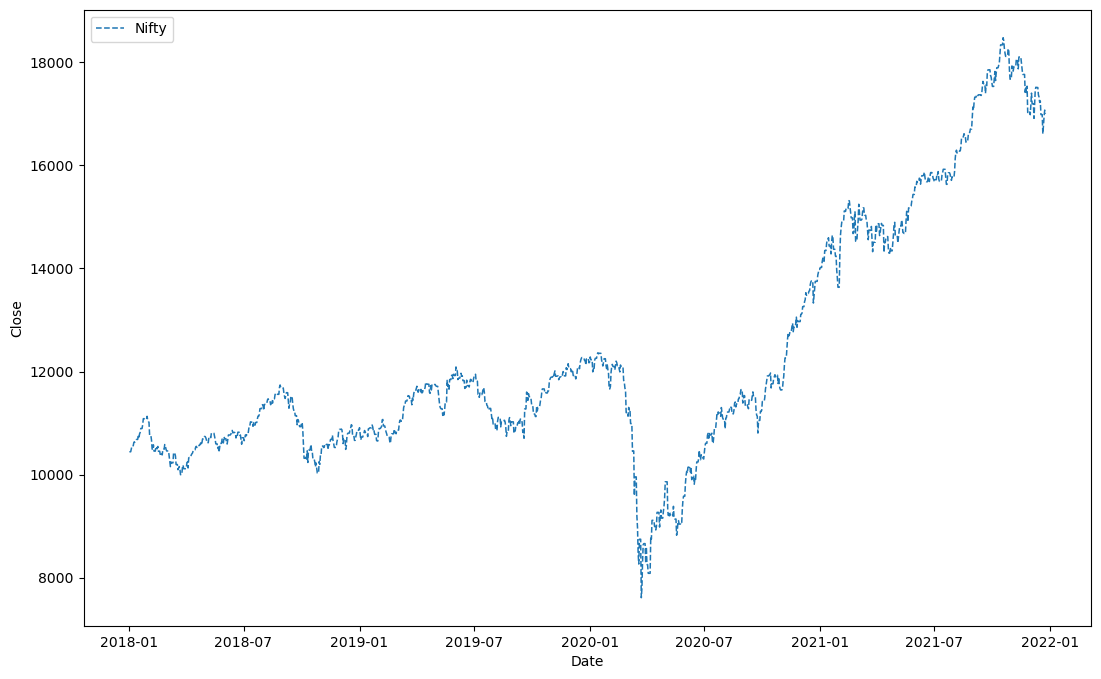

In [132]:
plt.figure(figsize=(13,8))
sns.lineplot(nifty.index,nifty.Close,label='Nifty',linestyle='--',linewidth = 1.1)
plt.show()

# Decomposition of Time Series of NIFTY 50

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose #A object with seasonal, trend, and resid attributes.

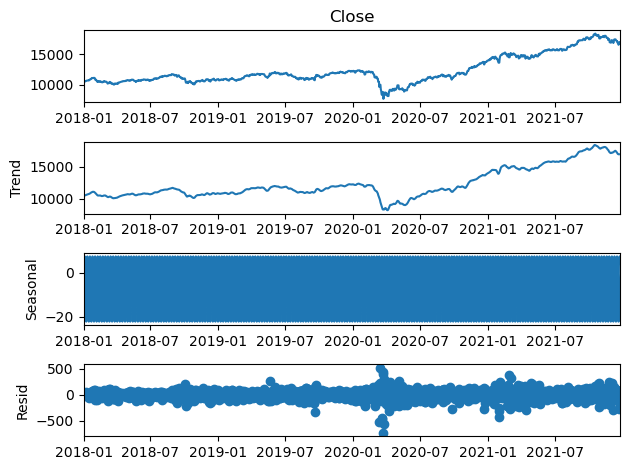

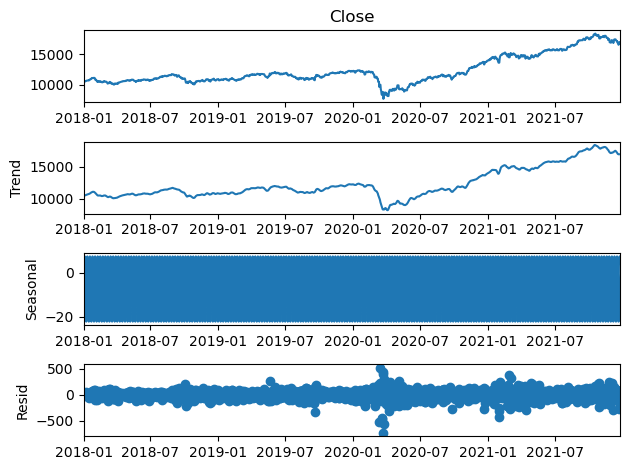

In [134]:
components = seasonal_decompose(nifty['Close'])
components.plot()

# Checking Seasonality using Additive and Multiplicative model

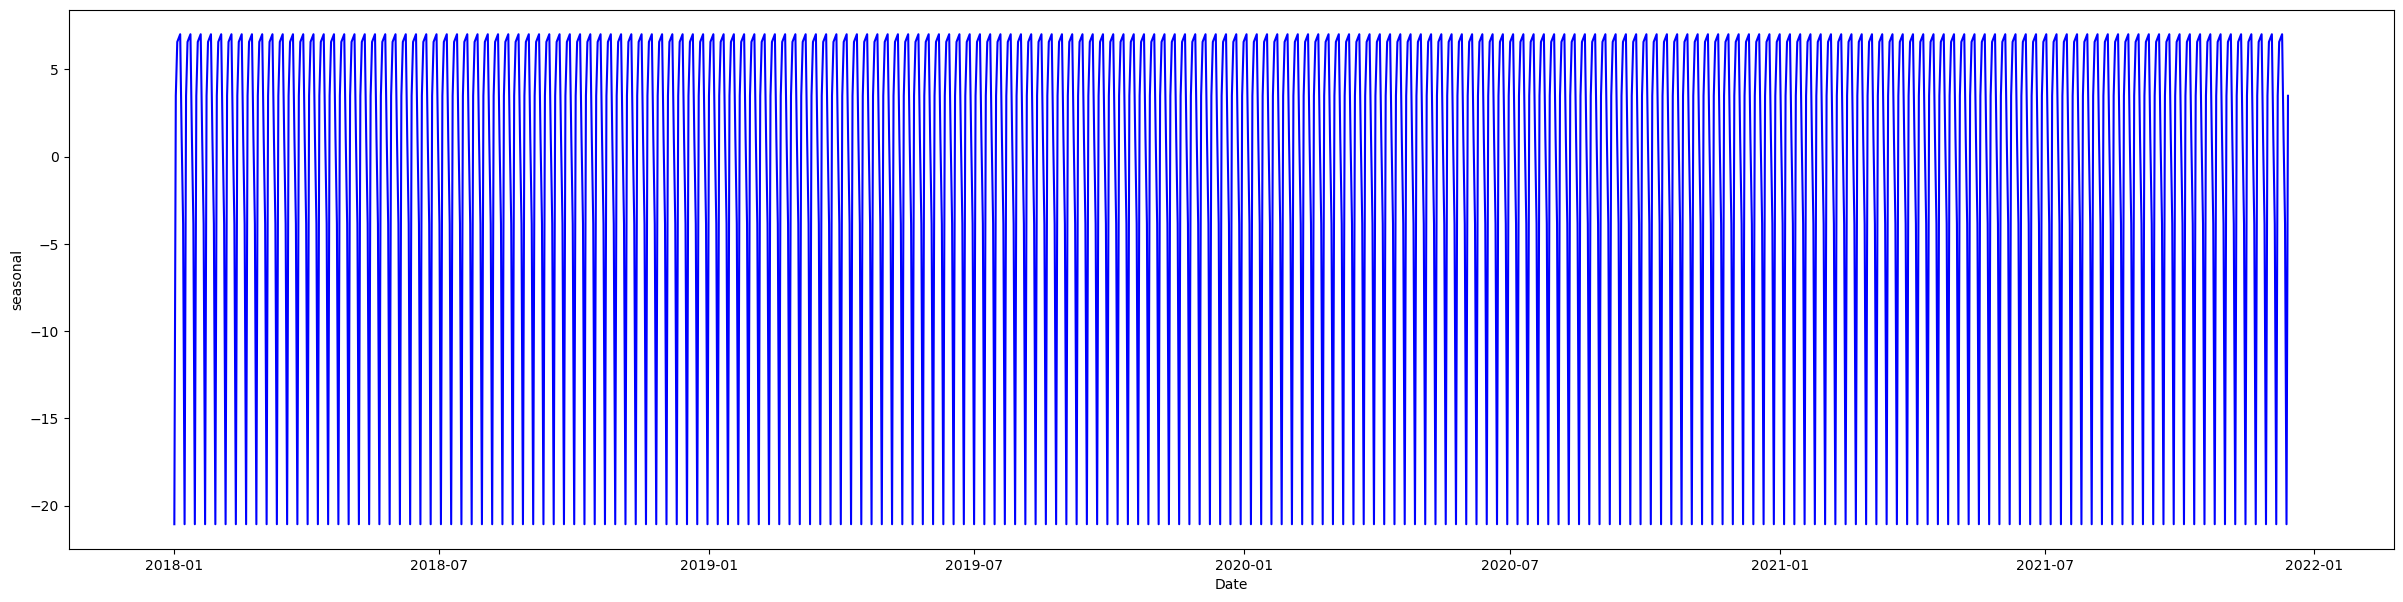

In [164]:
components = seasonal_decompose(nifty['Close'],model='additive') #The additive model is useful when the seasonal variation is relatively constant over time.
seasonality_data = components.seasonal
plt.figure(figsize=(30,7))
sns.lineplot(nifty.index,seasonality_data,color='blue')
plt.show()

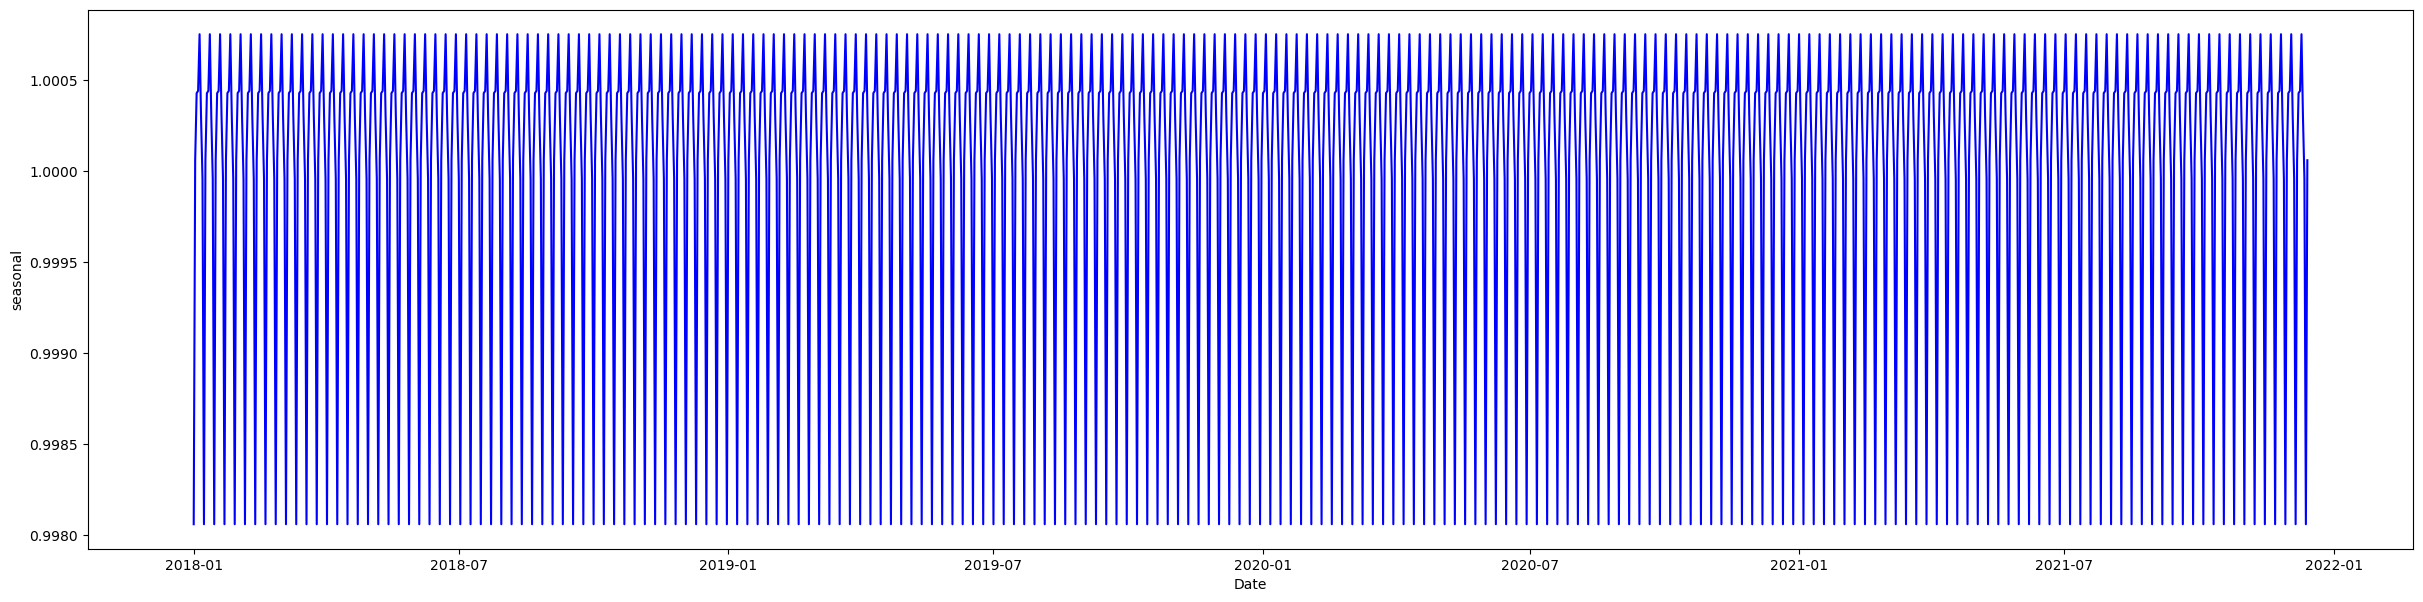

In [165]:
components = seasonal_decompose(nifty['Close'],model='multiplicative') #The multiplicative model is useful when the seasonal variation increases over time.
seasonality_data = components.seasonal
plt.figure(figsize=(30,7))
sns.lineplot(nifty.index,seasonality_data,color='blue')
plt.show()

# Time Series Forecasting Model

# Simple Moving Average

In [169]:
nifty['SMA'] = nifty['Close'].rolling(5).mean().shift(1) # Shift(1) to avoid forward moving bias

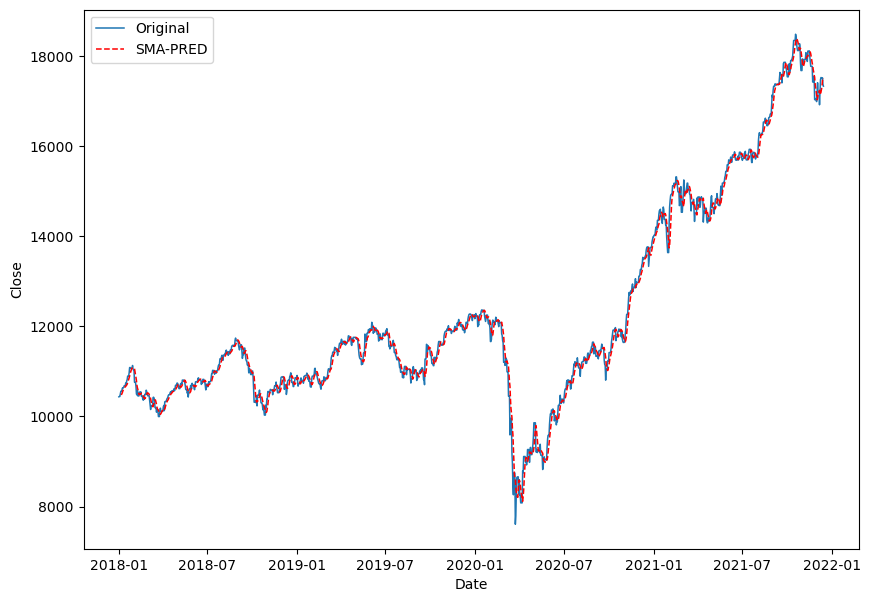

In [170]:
plt.figure(figsize=(10,7))
sns.lineplot(nifty.index,nifty['Close'],label ='Original',linewidth = 1.1)
sns.lineplot(nifty.index,nifty['SMA'], color='red',linestyle='--',label='SMA-PRED',linewidth = 1.1)
plt.legend()
plt.show()

# Exponential Moving Average

In [171]:
nifty['EMA'] = nifty['Close'].ewm(span= 5).mean()

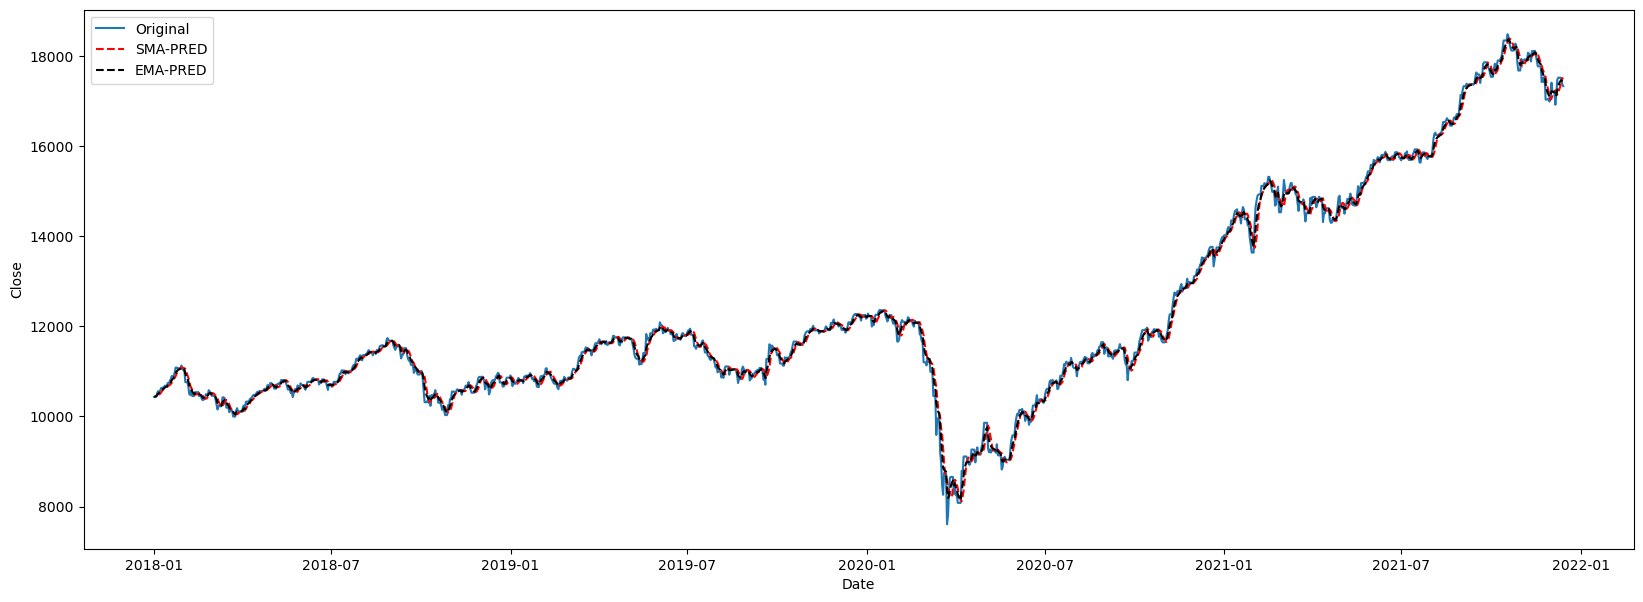

In [172]:
plt.figure(figsize=(20,7))
sns.lineplot(nifty.index,nifty['Close'],label ='Original')
sns.lineplot(nifty.index,nifty.SMA, color='red',linestyle='--',label='SMA-PRED')
sns.lineplot(nifty.index,nifty.EMA, color='black',linestyle='--',label='EMA-PRED')

plt.legend()
plt.show()

# Auto Arima

In [173]:
trainX = nifty[nifty.index < dt.datetime(2020,1,1)]['Close']
testX = nifty[nifty.index >= dt.datetime(2020,1,1)]['Close']

In [187]:
stepwise_fit = pm.auto_arima(trainX, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1,trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8757.763, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8522.665, Time=0.89 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8759.549, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8443.961, Time=1.85 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.02 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.90 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8442.630, Time=0.89 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=8521.256, Time=0.73 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.50 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=8444.039, Time=4.10 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=17.30 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=8444.595, 

In [188]:
stepwise_fit

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [190]:
stepwise_fit.predict(7)

array([12160.16709917, 12186.90013722, 12172.83034097, 12159.23121301,
       12168.51553078, 12212.10702492, 12183.78077035])

In [191]:
testPred = stepwise_fit.predict(len(testX))

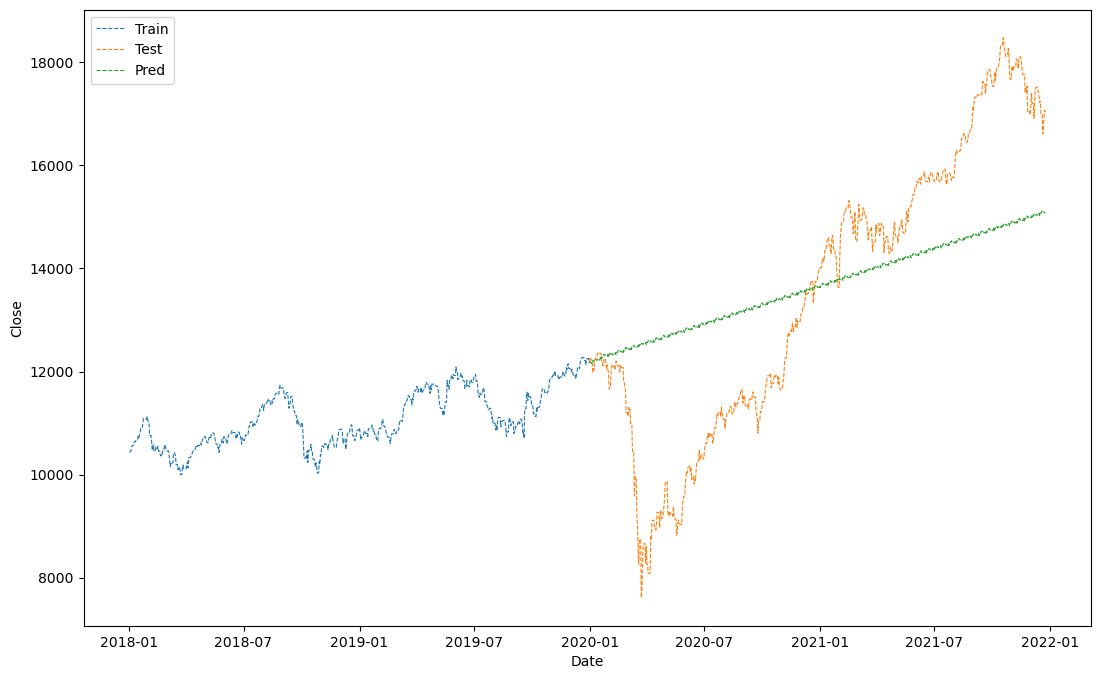

In [192]:
plt.figure(figsize=(13,8))
sns.lineplot(trainX.index,trainX,label='Train',linestyle='--',linewidth = 0.8)
sns.lineplot(testX.index,testX,label='Test',linestyle='--',linewidth = 0.8)
sns.lineplot(testX.index,testPred,label='Pred',linestyle='--',linewidth = 0.8)

plt.show()

# NEXT DAY  BUY PREDICTION SIGNAL

In [155]:
period_2 =[]
for i in testX:
    fc_2 = stepwise_fit.predict(2)[-1]
    period_2.append(fc_2)
    stepwise_fit.update(i)

In [156]:
pd.DataFrame(testX)

,Close
Date,
2020-01-01,12182.50
2020-01-02,12282.20
2020-01-03,12226.65
2020-01-04,12226.65
2020-01-05,12226.65
...,...
2021-12-20,16614.20
2021-12-21,16770.85
2021-12-22,16955.45


In [157]:
strategy = pd.DataFrame(testX)

In [158]:
strategy['2DayFC'] = period_2

In [161]:
strategy['AcutalClose'] = strategy['Close'].shift(-2)

In [162]:
strategy['returns'] = (strategy['AcutalClose']/strategy['Close'])-1

In [163]:
strategy

,Close,2DayFC,AcutalClose,returns
Date,,,,
2020-01-01,12182.50,12186.900137,12226.65,0.003624
2020-01-02,12282.20,12195.005711,12226.65,-0.004523
2020-01-03,12226.65,12254.531262,12226.65,0.000000
2020-01-04,12226.65,12222.535216,11993.05,-0.019106
2020-01-05,12226.65,12279.742605,12052.95,-0.014207
...,...,...,...,...
2021-12-20,16614.20,16917.734386,16955.45,0.020540
2021-12-21,16770.85,16592.003859,17072.60,0.017993
2021-12-22,16955.45,16707.938852,17003.75,0.002849


In [164]:
strategy['predicted_return'] = (strategy['2DayFC']/strategy['Close']) -1

In [165]:
strategy

,Close,2DayFC,AcutalClose,returns,predicted_return
Date,,,,,
2020-01-01,12182.50,12186.900137,12226.65,0.003624,0.000361
2020-01-02,12282.20,12195.005711,12226.65,-0.004523,-0.007099
2020-01-03,12226.65,12254.531262,12226.65,0.000000,0.002280
2020-01-04,12226.65,12222.535216,11993.05,-0.019106,-0.000337
2020-01-05,12226.65,12279.742605,12052.95,-0.014207,0.004342
...,...,...,...,...,...
2021-12-20,16614.20,16917.734386,16955.45,0.020540,0.018270
2021-12-21,16770.85,16592.003859,17072.60,0.017993,-0.010664
2021-12-22,16955.45,16707.938852,17003.75,0.002849,-0.014598


In [166]:
strategy['Signal'] = np.where(strategy['predicted_return'] > 0,1,0)

In [167]:
strategy['StrategyReturn'] = strategy['returns']* strategy['Signal']

In [168]:
strategy

,Close,2DayFC,AcutalClose,returns,predicted_return,Signal,StrategyReturn
Date,,,,,,,
2020-01-01,12182.50,12186.900137,12226.65,0.003624,0.000361,1,0.003624
2020-01-02,12282.20,12195.005711,12226.65,-0.004523,-0.007099,0,-0.000000
2020-01-03,12226.65,12254.531262,12226.65,0.000000,0.002280,1,0.000000
2020-01-04,12226.65,12222.535216,11993.05,-0.019106,-0.000337,0,-0.000000
2020-01-05,12226.65,12279.742605,12052.95,-0.014207,0.004342,1,-0.014207
...,...,...,...,...,...,...,...
2021-12-20,16614.20,16917.734386,16955.45,0.020540,0.018270,1,0.020540
2021-12-21,16770.85,16592.003859,17072.60,0.017993,-0.010664,0,0.000000
2021-12-22,16955.45,16707.938852,17003.75,0.002849,-0.014598,0,0.000000


# 7TH DAY  BUY PREDICTION SIGNAL

In [193]:
period_7 =[]
for i in testX:
    fc_7 = stepwise_fit.predict(7)[-1]
    period_7.append(fc_7)
    stepwise_fit.update(i)

In [194]:
strategy = pd.DataFrame(testX)

In [195]:
strategy['7DayFC'] = period_7

In [196]:
weekdays = pd.Series(strategy.index).apply(lambda x : x.weekday())

In [197]:
strategy['weekday'] = weekdays.values

In [198]:
strategy['AcutalClose'] = strategy['Close'].shift(-7)

In [199]:
strategy['returns'] = (strategy['AcutalClose']/strategy['Close'])-1

In [200]:
strategy = strategy[strategy['weekday'] == 0]

In [201]:
strategy['predicted_return'] = (strategy['7DayFC']/strategy['Close']) -1

In [202]:
strategy['Signal'] = np.where(strategy['predicted_return'] > 0,1,0)

In [203]:
strategy['StrategyReturn'] = strategy['returns']* strategy['Signal']

In [204]:
strategy['StrategyReturn'] = strategy['returns']* strategy['Signal']

In [205]:
strategy['CumStrategyReturn'] = (1+strategy['StrategyReturn']).cumprod()

In [206]:
strategy

,Close,7DayFC,weekday,AcutalClose,returns,predicted_return,Signal,StrategyReturn,CumStrategyReturn
Date,,,,,,,,,
2020-01-06,11993.05,12278.782012,0,12329.55,0.028058,0.023825,1,0.028058,1.028058
2020-01-13,12329.55,12228.249237,0,12224.55,-0.008516,-0.008216,0,-0.000000,1.028058
2020-01-20,12224.55,12562.535956,0,12119.00,-0.008634,0.027648,1,-0.008634,1.019181
2020-01-27,12119.00,12159.059756,0,11707.90,-0.033922,0.003306,1,-0.033922,0.984609
2020-02-03,11707.90,11673.242097,0,12031.50,0.027639,-0.002960,0,0.000000,0.984609
...,...,...,...,...,...,...,...,...,...
2021-11-22,17416.55,17697.161994,0,17053.95,-0.020819,0.016112,1,-0.020819,1.017473
2021-11-29,17053.95,16704.621418,0,16912.25,-0.008309,-0.020484,0,-0.000000,1.017473
2021-12-06,16912.25,17071.684880,0,17368.25,0.026963,0.009427,1,0.026963,1.044907


# Yearly Returns

<AxesSubplot:xlabel='Date', ylabel='CumStrategyReturn'>

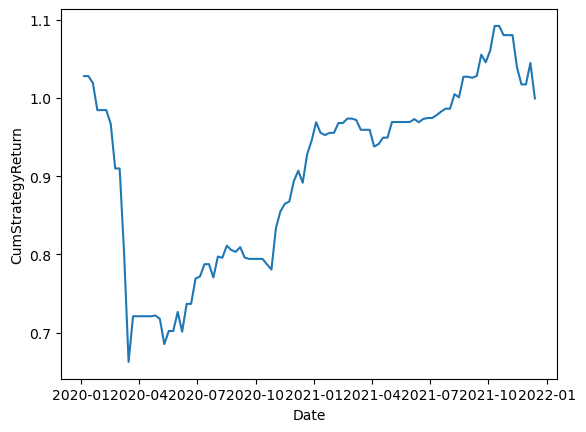

In [207]:
sns.lineplot(strategy.index,strategy.CumStrategyReturn)

# Pair Trading Analysis of Nifty 50 stocks

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [9]:
nifty_50_url = 'https://www1.nseindia.com/content/indices/ind_nifty50list.csv' #importing Nifty50 url for yfinance 

In [10]:
df = pd.read_csv(nifty_50_url)

In [11]:
df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [12]:
end_date = dt.date.today()
start_date = dt.date(2018,1,1)

In [13]:
sym = list(df.Symbol)

In [14]:
sym = [s+".NS" for s in sym]

In [15]:
import yfinance as yf

In [16]:
data = yf.download(sym,start_date,end_date)["Adj Close"]

[*********************100%***********************]  50 of 50 completed


In [17]:
data

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,390.357330,1113.319214,564.798584,2916.106934,5164.510254,1712.963623,473.010620,368.511139,2208.544922,600.156799,...,557.129517,302.612244,424.450012,628.096191,1224.886963,445.886414,832.651123,4199.937500,481.939575,234.497635
2018-01-02,388.159637,1112.442871,558.806030,2920.982910,5093.860840,1711.970947,462.840790,362.135010,2170.230957,596.525513,...,555.285583,300.919800,439.299988,634.270996,1218.219849,455.502563,825.520752,4196.236816,493.226868,236.090332
2018-01-03,398.171295,1111.615356,559.754822,2873.374756,5092.213379,1702.689697,464.319153,358.584656,2181.836914,595.544006,...,552.276917,300.968170,433.899994,639.184814,1221.669067,460.377075,836.411682,4245.232910,494.725403,229.608414
2018-01-04,400.320160,1140.966064,559.205566,2894.120361,5055.365234,1741.105103,468.620117,356.121155,2156.410645,605.309448,...,564.068787,301.983612,429.950012,661.188171,1230.211304,463.124542,872.161682,4288.208008,498.455902,230.867752
2018-01-05,413.945831,1153.816040,562.551331,2907.773193,5119.924316,1801.160278,483.852509,353.367798,2164.660889,603.739075,...,561.691040,302.660645,431.600006,670.276550,1245.073242,465.694763,888.571472,4337.845215,493.705078,229.312088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,701.700012,3239.449951,674.349976,3105.199951,15826.200195,6634.149902,658.250000,360.000000,3471.899902,893.799988,...,763.950012,709.549988,447.049988,1072.949951,3556.899902,1598.050049,2239.350098,7160.850098,708.299988,665.950012
2021-12-21,725.599976,3271.350098,665.849976,3130.800049,15831.950195,6577.549805,667.000000,364.200012,3505.750000,886.750000,...,778.549988,705.700012,453.600006,1105.099976,3608.300049,1632.949951,2287.649902,7327.350098,733.650024,690.799988
2021-12-22,722.849976,3280.100098,669.349976,3135.850098,15945.900391,6771.200195,684.750000,372.450012,3497.000000,889.700012,...,797.500000,714.950012,470.500000,1128.849976,3630.750000,1659.750000,2299.750000,7377.250000,754.299988,685.650024


In [18]:
df_returns = data.pct_change()

In [19]:
df_returns

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,-0.005630,-0.000787,-0.010610,0.001672,-0.013680,-0.000580,-0.021500,-0.017302,-0.017348,-0.006051,...,-0.003310,-0.005593,0.034986,0.009831,-0.005443,0.021566,-0.008563,-0.000881,0.023421,0.006792
2018-01-03,0.025793,-0.000744,0.001698,-0.016299,-0.000323,-0.005421,0.003194,-0.009804,0.005348,-0.001645,...,-0.005418,0.000161,-0.012292,0.007747,0.002831,0.010701,0.013193,0.011676,0.003038,-0.027455
2018-01-04,0.005397,0.026404,-0.000981,0.007220,-0.007236,0.022562,0.009263,-0.006870,-0.011654,0.016398,...,0.021351,0.003374,-0.009103,0.034424,0.006992,0.005968,0.042742,0.010123,0.007541,0.005485
2018-01-05,0.034037,0.011262,0.005983,0.004717,0.012770,0.034493,0.032505,-0.007732,0.003826,-0.002594,...,-0.004215,0.002242,0.003838,0.013746,0.012081,0.005550,0.018815,0.011575,-0.009531,-0.006738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,-0.030734,-0.001310,-0.021121,-0.023261,-0.023327,-0.038682,-0.011711,-0.064206,-0.018169,0.039061,...,-0.006502,-0.023129,-0.049234,-0.052248,-0.007658,-0.027270,-0.018001,-0.024055,-0.010201,-0.007230
2021-12-21,0.034060,0.009847,-0.012605,0.008244,0.000363,-0.008532,0.013293,0.011667,0.009750,-0.007888,...,0.019111,-0.005426,0.014652,0.029964,0.014451,0.021839,0.021569,0.023251,0.035790,0.037315
2021-12-22,-0.003790,0.002675,0.005256,0.001613,0.007197,0.029441,0.026612,0.022652,-0.002496,0.003327,...,0.024340,0.013108,0.037257,0.021491,0.006222,0.016412,0.005289,0.006810,0.028147,-0.007455


# Finding Correlation between Nifty 50 Shares

In [20]:
corr = df_returns.corr()

In [21]:
corr[corr>0.5]

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIPORTS.NS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASIANPAINT.NS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AXISBANK.NS,NaN,NaN,1.000000,NaN,0.559828,0.531685,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAJAJ-AUTO.NS,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAJAJFINSV.NS,NaN,NaN,0.559828,NaN,1.000000,0.814795,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAJFINANCE.NS,NaN,NaN,0.531685,NaN,0.814795,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BHARTIARTL.NS,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BPCL.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRITANNIA.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIPLA.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

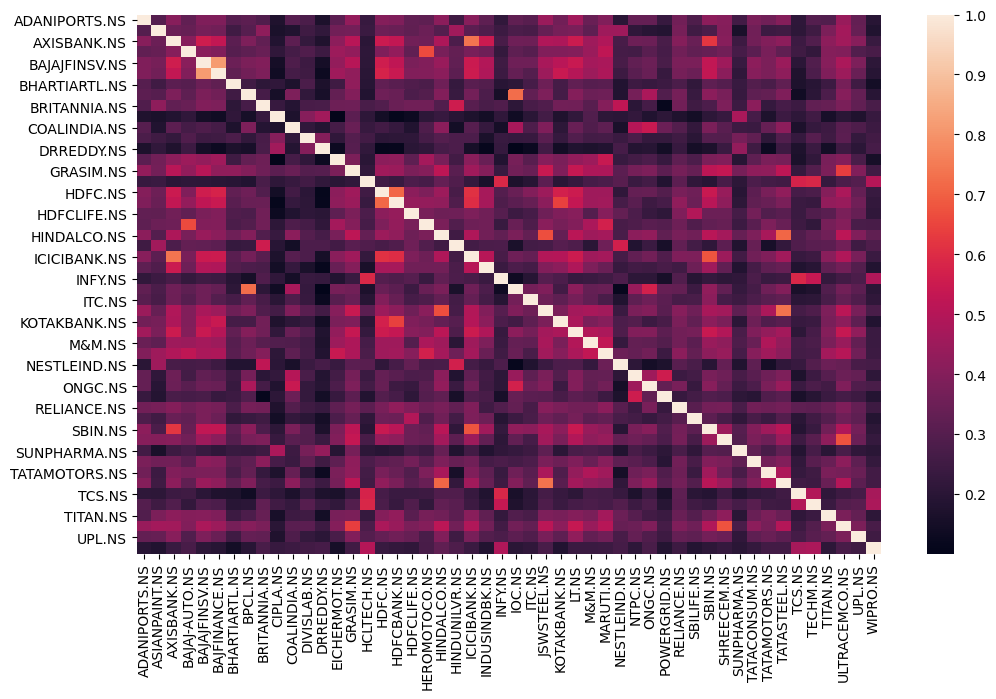

In [22]:
plt.figure(figsize=(12,7))
sns.heatmap(corr)

In [23]:
np.where(corr > 0.5)

(array([ 0,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         6,  7,  7,  8,  8,  8,  9, 10, 10, 10, 11, 12, 13, 13, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19,
        20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 26, 27, 27, 27, 27,
        27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34,
        35, 35, 36, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39,
        39, 40, 41, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 45, 45, 45, 46,
        47, 47, 47, 47, 47, 47, 47, 47, 48, 49, 49], dtype=int64),
 array([ 0,  1,  2,  4,  5, 14, 16, 17, 22, 23, 29, 38,  3, 19, 31,  2,  4,
         5, 14, 16, 1

In [24]:
for col in corr.columns:
    temp = corr[corr[col]>0.5]
    if len(temp)>3:
        print(temp)

               ADANIPORTS.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
AXISBANK.NS         0.407231       0.348693     1.000000       0.403469   
BAJAJFINSV.NS       0.391736       0.374103     0.559828       0.412740   
BAJFINANCE.NS       0.390277       0.360562     0.531685       0.394975   
GRASIM.NS           0.431017       0.365978     0.509629       0.429456   
HDFC.NS             0.400865       0.352653     0.547474       0.389560   
HDFCBANK.NS         0.389669       0.343679     0.530297       0.432850   
ICICIBANK.NS        0.409283       0.316269     0.738908       0.376779   
INDUSINDBK.NS       0.320554       0.288411     0.549228       0.354648   
LT.NS               0.459555       0.379501     0.550682       0.402231   
SBIN.NS             0.418754       0.277452     0.622330       0.337732   

               BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS   BPCL.NS  \
AXISBANK.NS         0.559828       0.531685       0.314820  0.385111   
BAJAJFINSV.NS       1.000000  

               ADANIPORTS.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
AXISBANK.NS         0.407231       0.348693     1.000000       0.403469   
BAJAJFINSV.NS       0.391736       0.374103     0.559828       0.412740   
BAJFINANCE.NS       0.390277       0.360562     0.531685       0.394975   
HDFC.NS             0.400865       0.352653     0.547474       0.389560   
HDFCBANK.NS         0.389669       0.343679     0.530297       0.432850   
ICICIBANK.NS        0.409283       0.316269     0.738908       0.376779   
INDUSINDBK.NS       0.320554       0.288411     0.549228       0.354648   
LT.NS               0.459555       0.379501     0.550682       0.402231   
SBIN.NS             0.418754       0.277452     0.622330       0.337732   

               BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS   BPCL.NS  \
AXISBANK.NS         0.559828       0.531685       0.314820  0.385111   
BAJAJFINSV.NS       1.000000       0.814795       0.347882  0.383098   
BAJFINANCE.NS       0.814795     

In [25]:
temp = corr[corr[col]>0.7]

In [26]:
s = corr.unstack()
so=s.sort_values(kind="quicksort",ascending=False)

# Pairs with Highest Correlation in Nifty 50

In [27]:
df = pd.DataFrame(so,columns = ['corr_val'])

In [28]:
df[(df['corr_val']<1)&(df['corr_val']>0.7)]

,,corr_val
BAJFINANCE.NS,BAJAJFINSV.NS,0.814795
BAJAJFINSV.NS,BAJFINANCE.NS,0.814795
ICICIBANK.NS,AXISBANK.NS,0.738908
AXISBANK.NS,ICICIBANK.NS,0.738908
TATASTEEL.NS,JSWSTEEL.NS,0.735472
JSWSTEEL.NS,TATASTEEL.NS,0.735472
IOC.NS,BPCL.NS,0.722801
BPCL.NS,IOC.NS,0.722801
HDFC.NS,HDFCBANK.NS,0.715298
HDFCBANK.NS,HDFC.NS,0.715298


# Pair Trading Visualization between Axis Bank and ICICI Bank

# AXIS BANK

In [29]:
url ='https://www.screener.in/company/AXISBANK/consolidated/#quarters'
df= pd.read_html(url)[0]    

Extracting Basic Information Regarding the Company

In [30]:
df = df.set_index('Unnamed: 0')

In [31]:
df

,Dec 2018,Mar 2019,Jun 2019,Sep 2019,Dec 2019,Mar 2020,Jun 2020,Sep 2020,Dec 2020,Mar 2021,Jun 2021,Sep 2021
Unnamed: 0,,,,,,,,,,,,
Revenue,14412,15094,15535,15713,15965,16503,16706,16218,15757,15790,16302,16683
Interest,8684,9257,9564,9481,9393,9557,9590,8781,8252,8077,8367,8598
Expenses +,7328,7129,7819,7842,8134,12986,8320,8796,9875,8944,8504,7827
Financing Profit,-1600,-1292,-1848,-1611,-1562,-6041,-1204,-1359,-2370,-1231,-570,258
Financing Margin %,-11%,-9%,-12%,-10%,-10%,-37%,-7%,-8%,-15%,-8%,-4%,2%
Other Income,4221,3856,3874,4174,4011,4283,2663,3909,4154,5188,3754,4284
Depreciation,0,0,0,0,0,0,0,0,0,0,0,0
Profit before tax,2621,2564,2026,2563,2449,-1758,1458,2550,1784,3957,3184,4542
Tax %,33%,35%,38%,101%,23%,29%,24%,27%,25%,25%,25%,26%


Net Profit Percentage Change at every Quater for the given Stock

In [32]:
temp=df.loc['Net Profit',:]

In [33]:
temp

Dec 2018     1768
Mar 2019     1671
Jun 2019     1261
Sep 2019      -22
Dec 2019     1876
Mar 2020    -1262
Jun 2020     1100
Sep 2020     1837
Dec 2020     1318
Mar 2021     2941
Jun 2021     2357
Sep 2021     3388
Name: Net Profit, dtype: object

In [34]:
net_profit = pd.DataFrame(temp)

In [35]:
net_profit.dtypes

Net Profit    object
dtype: object

In [36]:
net_profit['Net Profit']=net_profit['Net Profit'].apply(lambda x:float(x))

In [37]:
net_profit = net_profit.pct_change()

In [38]:
net_profit

,Net Profit
Dec 2018,NaN
Mar 2019,-0.054864
Jun 2019,-0.245362
Sep 2019,-1.017446
Dec 2019,-86.272727
Mar 2020,-1.672708
Jun 2020,-1.871632
Sep 2020,0.670000
Dec 2020,-0.282526
Mar 2021,1.231411


# AXIS BANK Stock Details

In [39]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('AXISBANK.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [40]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,487.282259,493.169355,481.331450,487.271776,481.932348,8.562226e+06
2017-06-30,507.685247,513.241804,501.461476,507.190986,501.633283,7.375277e+06
2017-09-30,509.156351,514.369843,504.217460,508.852381,507.983748,6.433364e+06
2017-12-31,528.426615,534.818551,521.978223,528.341130,527.685790,9.848979e+06
2018-03-31,551.519165,558.793338,543.619168,551.091666,550.408109,7.226013e+06
2018-06-30,527.668749,534.312501,520.319530,527.539850,526.885504,8.071593e+06
2018-09-30,588.918035,597.797544,579.104093,588.770493,588.040197,1.051927e+07
2018-12-31,602.342625,611.367215,592.151635,601.606557,600.860343,1.068977e+07
2019-03-31,698.329169,706.992503,691.171664,699.672498,698.804643,1.080729e+07


In [41]:
stock_ops1 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [42]:
stock_ops1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.107000,0.114381,0.107762,0.096147,0.096147,1.286938
2017-06-30,0.030058,0.032361,0.034090,0.033460,0.033460,0.320522
2017-09-30,-0.011603,-0.009295,-0.019223,-0.015660,-0.005988,2.127742
2017-12-31,0.066537,0.098356,0.085102,0.106544,0.106544,-0.219308
2018-03-31,-0.090280,-0.099860,-0.105085,-0.097259,-0.097259,0.581534
2018-06-30,-0.001875,0.011799,0.013308,0.023545,0.023545,0.088048
2018-09-30,0.171806,0.206306,0.181014,0.197169,0.197169,1.463947
2018-12-31,0.024874,0.023401,0.080873,0.044570,0.044570,-0.700256
2019-03-31,0.223830,0.249841,0.217479,0.244540,0.244540,0.366575


# ICICI BANK 

In [43]:
url ='https://www.screener.in/company/ICICIBANK/consolidated/#quarters'
df= pd.read_html(url)[0]    

Extracting Basic Information Regarding the Company

In [44]:
df = df.set_index('Unnamed: 0')

In [45]:
df

,Dec 2018,Mar 2019,Jun 2019,Sep 2019,Dec 2019,Mar 2020,Jun 2020,Sep 2020,Dec 2020,Mar 2021,Jun 2021,Sep 2021
Unnamed: 0,,,,,,,,,,,,
Revenue,18516,19504,20366,21106,21623,21741,22423,22226,22214,22300,22615,23478
Interest,10146,10352,11009,11335,11297,11025,11347,10945,10412,9955,10068,10093
Expenses +,20407,24752,18652,20453,20309,27119,22005,21504,22484,26656,18842,21041
Financing Profit,-12038,-15600,-9295,-10681,-9983,-16403,-10929,-10222,-10683,-14311,-6294,-7656
Financing Margin %,-65%,-80%,-46%,-51%,-46%,-75%,-49%,-46%,-48%,-64%,-28%,-33%
Other Income,14918,17281,13503,16318,16748,18381,15517,17095,18241,21322,12865,16261
Depreciation,0,0,0,0,0,0,0,0,0,0,0,0
Profit before tax,2879,1681,4208,5638,6765,1977,4587,6873,7558,7010,6571,8606
Tax %,22%,9%,31%,72%,24%,18%,22%,21%,20%,24%,25%,24%


Net Profit Percentage Change at every Quater for the given Stock

In [46]:
temp=df.loc['Net Profit',:]

In [47]:
temp

Dec 2018    1874
Mar 2019    1170
Jun 2019    2514
Sep 2019    1131
Dec 2019    4670
Mar 2020    1251
Jun 2020    3118
Sep 2020    4882
Dec 2020    5498
Mar 2021    4886
Jun 2021    4763
Sep 2021    6092
Name: Net Profit, dtype: object

In [48]:
net_profit = pd.DataFrame(temp)

In [49]:
net_profit.dtypes

Net Profit    object
dtype: object

In [50]:
net_profit['Net Profit']=net_profit['Net Profit'].apply(lambda x:float(x))

In [51]:
net_profit = net_profit.pct_change()

In [52]:
net_profit

,Net Profit
Dec 2018,NaN
Mar 2019,-0.375667
Jun 2019,1.148718
Sep 2019,-0.550119
Dec 2019,3.129089
Mar 2020,-0.732120
Jun 2020,1.492406
Sep 2020,0.565747
Dec 2020,0.126178
Mar 2021,-0.111313


# ICICI BANK Stock Details

In [53]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('ICICIBANK.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [54]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,249.380498,251.835776,246.274193,249.065980,241.414679,1.850150e+07
2017-06-30,274.382338,277.366989,271.381820,274.394411,266.255575,2.128729e+07
2017-09-30,295.053969,297.163492,291.500792,294.268255,287.470006,1.220572e+07
2017-12-31,301.112903,305.158065,297.607257,301.395967,294.433048,1.687849e+07
2018-03-31,318.436666,322.277500,313.997499,318.073334,310.725132,1.710423e+07
2018-06-30,288.485156,292.421094,284.439842,288.245310,281.586202,2.158470e+07
2018-09-30,306.693442,311.304100,302.518032,307.172951,303.251497,2.142316e+07
2018-12-31,343.040983,348.311476,338.555736,343.981968,341.310345,2.199688e+07
2019-03-31,366.641667,371.013333,362.754998,367.195832,364.343914,1.807846e+07


In [55]:
stock_ops2 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [56]:
stock_ops2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.093835,0.103785,0.111245,0.098829,0.098829,0.897466
2017-06-30,0.152080,0.117606,0.142315,0.113237,0.121986,-0.391897
2017-09-30,-0.047872,-0.036270,-0.045022,-0.046371,-0.046371,0.634520
2017-12-31,0.123077,0.124866,0.135744,0.127874,0.127873,0.427235
2018-03-31,-0.098726,-0.097771,-0.103526,-0.102965,-0.102965,2.510898
2018-06-30,-0.003663,0.007851,0.041731,0.051747,0.051747,-0.714687
2018-09-30,0.128102,0.113255,0.113653,0.101478,0.118769,-0.623004
2018-12-31,0.184460,0.153785,0.196140,0.146975,0.146975,-0.653432
2019-03-31,0.086445,0.101700,0.101992,0.101168,0.101168,1.979106


# Visualization of Correlation between two stocks for Pair Trading

In [57]:
ICICIBANK =stock_ops2.loc['2018':][['Adj Close']]

In [58]:
AXISBANK =stock_ops1.loc['2018':][['Adj Close']]

In [59]:
temp=pd.concat([AXISBANK['Adj Close'],ICICIBANK['Adj Close']],axis=1).dropna()

<AxesSubplot:title={'center':'AXISBANK VS ICICIBANK'}, xlabel='Date'>

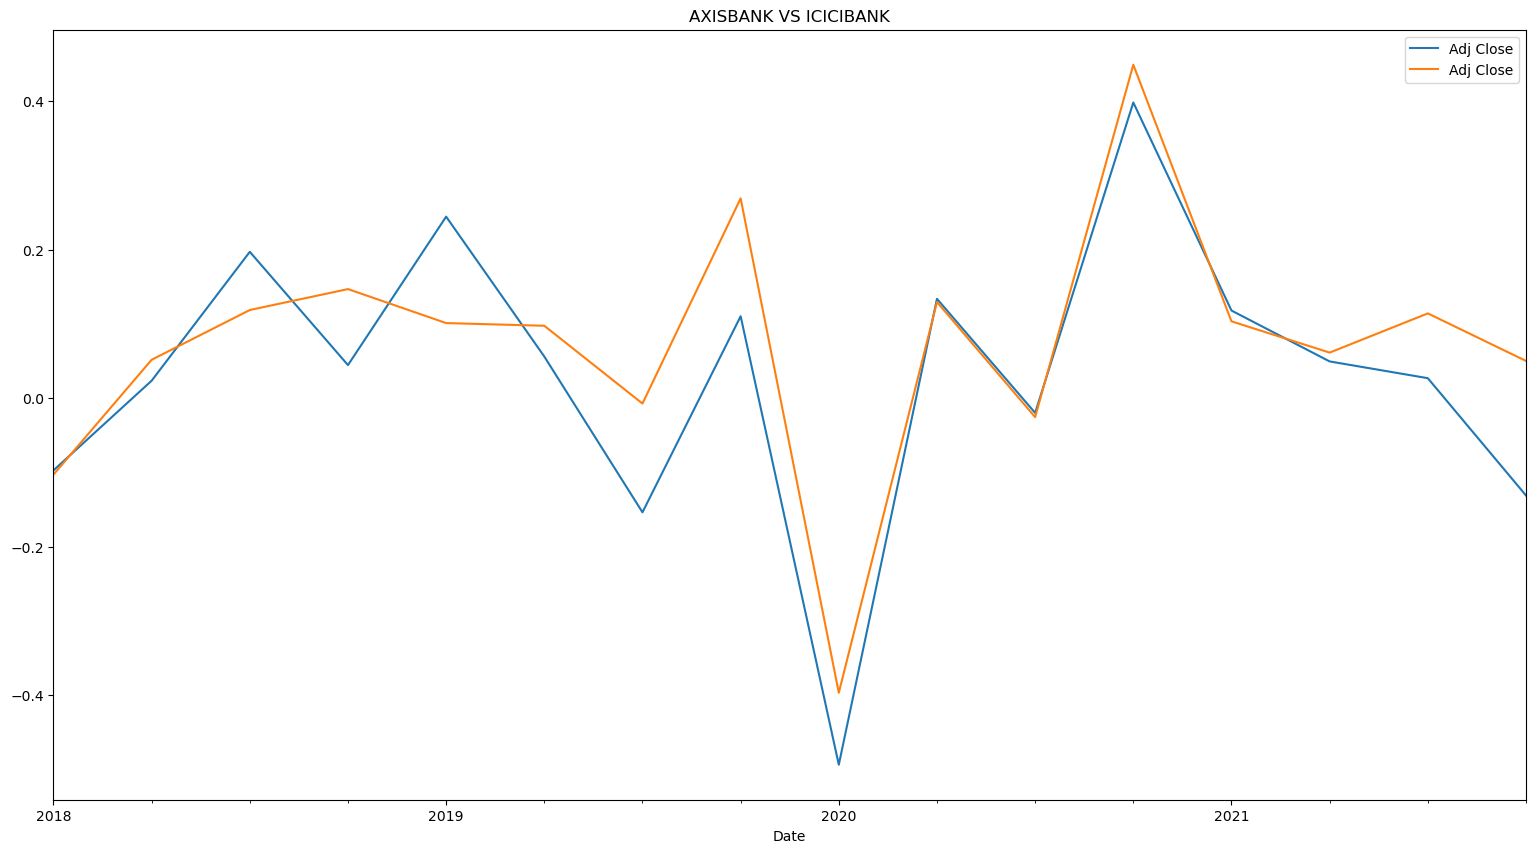

In [60]:
temp.plot(figsize=(19,10),title='AXISBANK VS ICICIBANK')

# Pair Trading Visualization between Tata Steel and JSW Steel

# Tata Steel Stock Details

In [61]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('TATASTEEL.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [62]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,446.480817,451.758517,440.875040,446.644472,400.578105,5.506031e+06
2017-06-30,460.148370,465.735935,454.043826,459.383057,412.002849,7.101300e+06
2017-09-30,581.702429,587.668380,575.776560,582.004889,529.527007,5.064737e+06
2017-12-31,667.830736,674.828742,660.214988,667.511877,609.333121,4.311460e+06
2018-03-31,675.769591,685.243757,663.524952,673.026890,614.367454,8.127796e+06
2018-06-30,583.626563,591.219532,574.839059,582.437501,531.673621,7.542391e+06
2018-09-30,575.080330,583.022955,564.751637,573.558199,532.446569,8.883633e+06
2018-12-31,549.283606,556.186886,540.565574,548.084425,509.231359,7.322080e+06
2019-03-31,491.036667,497.190001,484.045833,490.467502,455.698821,7.962964e+06


In [63]:
stock_ops1 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [64]:
stock_ops1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.221629,0.189911,0.231808,0.186724,0.186724,-0.423587
2017-06-30,0.099691,0.118392,0.097867,0.123289,0.123289,1.697008
2017-09-30,0.200367,0.187314,0.199244,0.185162,0.206280,-0.559721
2017-12-31,0.124143,0.118561,0.111957,0.108354,0.108353,-0.011739
2018-03-31,-0.167407,-0.167907,-0.175339,-0.170066,-0.170066,8.691341
2018-06-30,-0.036904,-0.018094,-0.030012,-0.019091,-0.019091,0.375658
2018-09-30,0.062592,0.043478,0.033708,0.037021,0.055503,-0.173573
2018-12-31,-0.103448,-0.103790,-0.074081,-0.106567,-0.106567,0.142388
2019-03-31,-0.018321,-0.015348,-0.017038,-0.018323,-0.018323,1.171685


# JSWSTEEL Stock Details

In [ ]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('JSWSTEEL.NS',start_date,end_date)

In [66]:
stock_ops2 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [67]:
stock_ops2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.142199,0.158754,0.148997,0.151563,0.151563,-0.017019
2017-06-30,0.092869,0.085521,0.081283,0.076760,0.088889,0.605601
2017-09-30,0.183403,0.209927,0.183538,0.211656,0.211656,-0.001161
2017-12-31,0.076984,0.079227,0.089048,0.079416,0.079416,-0.371876
2018-03-31,0.101670,0.097534,0.083412,0.084086,0.084086,3.060008
2018-06-30,0.120690,0.103715,0.119688,0.102006,0.102006,0.617310
2018-09-30,0.235015,0.240913,0.201284,0.217773,0.243351,2.687394
2018-12-31,-0.199733,-0.204084,-0.191323,-0.194565,-0.194565,-0.195579
2019-03-31,-0.074134,-0.061185,-0.061157,-0.051653,-0.051653,5.002685


# Visualization of Correlation between two stocks for Pair Trading

In [69]:
TATASTEEL =stock_ops1.loc['2018':][['Adj Close']]

In [70]:
JSWSTEEL =stock_ops2.loc['2018':][['Adj Close']]

In [71]:
temp1=pd.concat([TATASTEEL['Adj Close'],JSWSTEEL['Adj Close']],axis=1).dropna()

<AxesSubplot:title={'center':'TATASTEEL VS JSWSTEEL'}, xlabel='Date'>

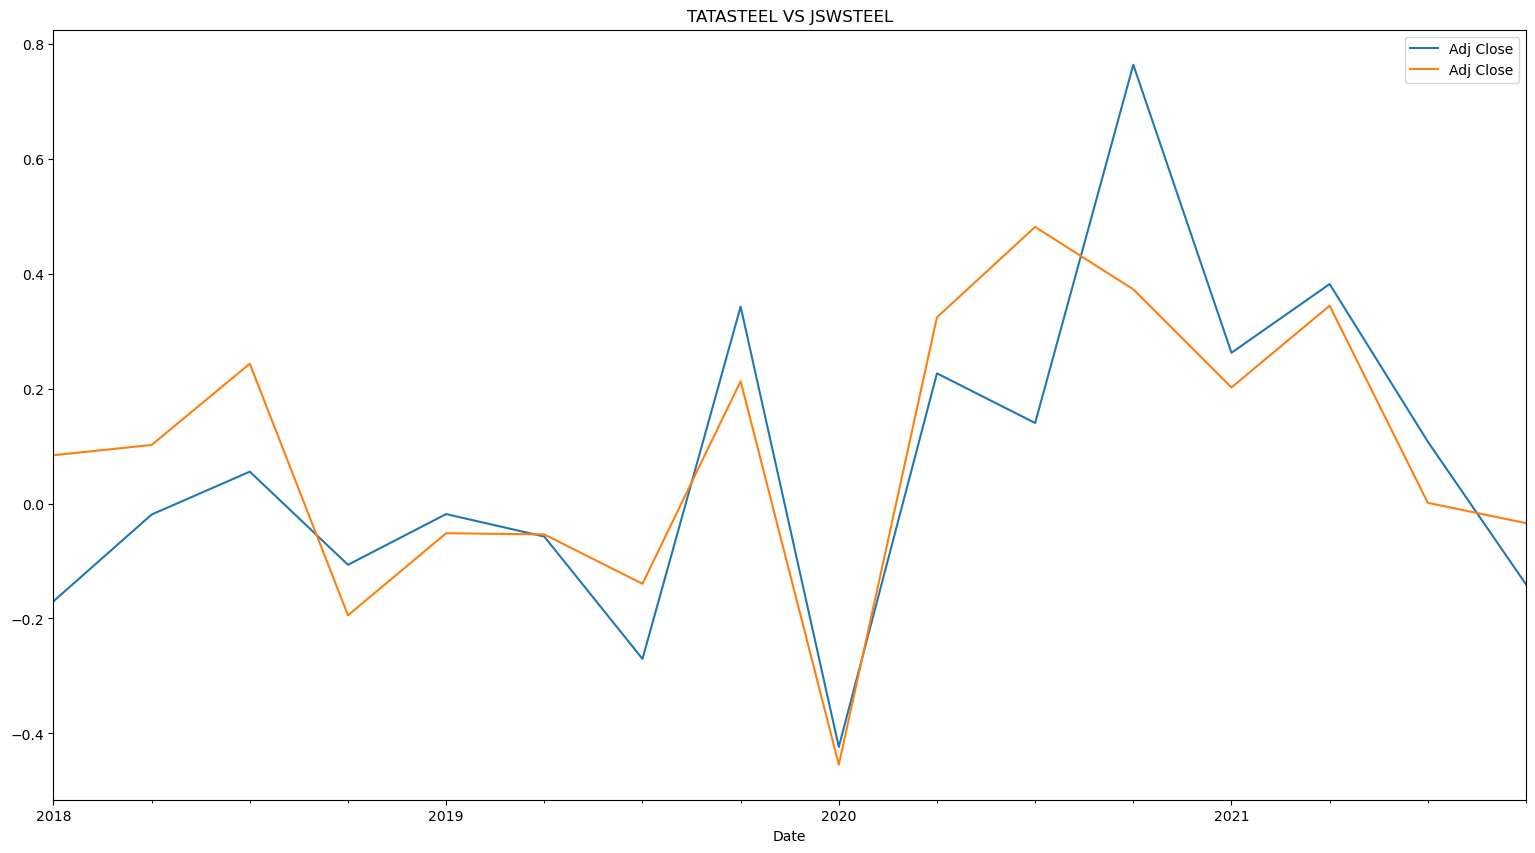

In [72]:
temp1.plot(figsize=(19,10),title='TATASTEEL VS JSWSTEEL')

# Pair Trading Visualization between IOC and BPCL

# IOC Stock Details

In [73]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('IOC.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [74]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,185.608871,187.885887,183.269356,185.563307,129.851133,9.715492e+06
2017-06-30,210.881558,213.419261,207.636885,210.163524,150.853801,1.068585e+07
2017-09-30,203.126190,205.941270,199.823809,202.504762,145.526204,9.988499e+06
2017-12-31,202.545161,204.489515,199.897178,201.955243,145.302800,7.851888e+06
2018-03-31,191.285416,193.240833,188.729167,190.732499,140.846749,1.197826e+07
2018-06-30,167.562499,169.870311,164.810157,167.203125,126.224643,1.080866e+07
2018-09-30,158.891802,160.523771,156.754099,158.415574,120.245205,7.341634e+06
2018-12-31,138.123771,140.256557,134.531968,137.363934,105.505685,1.695742e+07
2019-03-31,140.997500,143.198333,138.918334,141.200001,113.151930,1.401721e+07


In [76]:
stock_ops1 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [77]:
stock_ops1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.158786,0.186364,0.156159,0.182012,0.238550,3.375957
2017-06-30,-0.007880,0.007622,0.007789,0.010626,0.010626,-0.291640
2017-09-30,0.033229,0.040811,0.029419,0.035151,0.037585,1.476180
2017-12-31,-0.027401,-0.038462,-0.027003,-0.044275,-0.044275,0.937585
2018-03-31,-0.110513,-0.090191,-0.115830,-0.094243,-0.049630,2.998814
2018-06-30,-0.125913,-0.113726,-0.093695,-0.084776,-0.084776,-0.380356
2018-09-30,-0.020487,-0.019334,-0.005585,-0.002277,0.010388,-0.418300
2018-12-31,-0.094118,-0.103226,-0.089667,-0.109776,-0.067189,0.160076
2019-03-31,0.180758,0.189130,0.176449,0.171387,0.182348,6.250769


# BPCL Stock Details

In [78]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('BPCL.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [79]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,447.038711,452.277418,440.887099,446.366667,311.981627,3.392897e+06
2017-06-30,470.114754,475.224042,463.108743,469.167213,339.582825,3.558925e+06
2017-09-30,487.815608,494.797356,480.282011,487.675398,353.349991,4.413803e+06
2017-12-31,511.156453,517.234677,503.845161,511.141937,370.352900,3.162858e+06
2018-03-31,463.895833,469.314166,456.505835,462.219999,338.985418,4.073440e+06
2018-06-30,402.940625,408.523438,395.681251,402.172658,300.807839,6.159212e+06
2018-09-30,375.766393,380.445082,369.681147,374.705739,281.904324,4.468448e+06
2018-12-31,315.826229,322.173771,307.829510,315.150820,240.349626,7.809661e+06
2019-03-31,354.368332,359.657500,349.769998,355.118334,274.603325,4.351102e+06


In [80]:
stock_ops2 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [81]:
stock_ops2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.006250,0.020551,0.007295,0.014598,0.062816,1.181797
2017-06-30,-0.038444,-0.012701,-0.022385,0.001566,0.002965,3.269516
2017-09-30,0.092017,0.096185,0.082878,0.088704,0.088704,0.119979
2017-12-31,0.096960,0.099751,0.103640,0.081132,0.081132,-0.509441
2018-03-31,-0.191120,-0.177820,-0.180501,-0.159556,-0.132416,2.021885
2018-06-30,-0.137227,-0.125952,-0.143043,-0.118328,-0.118328,2.020400
2018-09-30,-0.004533,-0.001587,-0.004357,0.013407,0.033314,-0.158765
2018-12-31,-0.027151,-0.021328,-0.004025,-0.015203,-0.015203,0.073728
2019-03-31,0.051239,0.053480,0.050972,0.050790,0.085805,2.596918


# Visualization of Correlation between two stocks for Pair Trading

In [83]:
IOC =stock_ops1.loc['2018':][['Adj Close']]

In [84]:
BPCL =stock_ops2.loc['2018':][['Adj Close']]

In [85]:
temp2=pd.concat([IOC['Adj Close'],BPCL['Adj Close']],axis=1).dropna()

<AxesSubplot:title={'center':'IOC VS BPCL'}, xlabel='Date'>

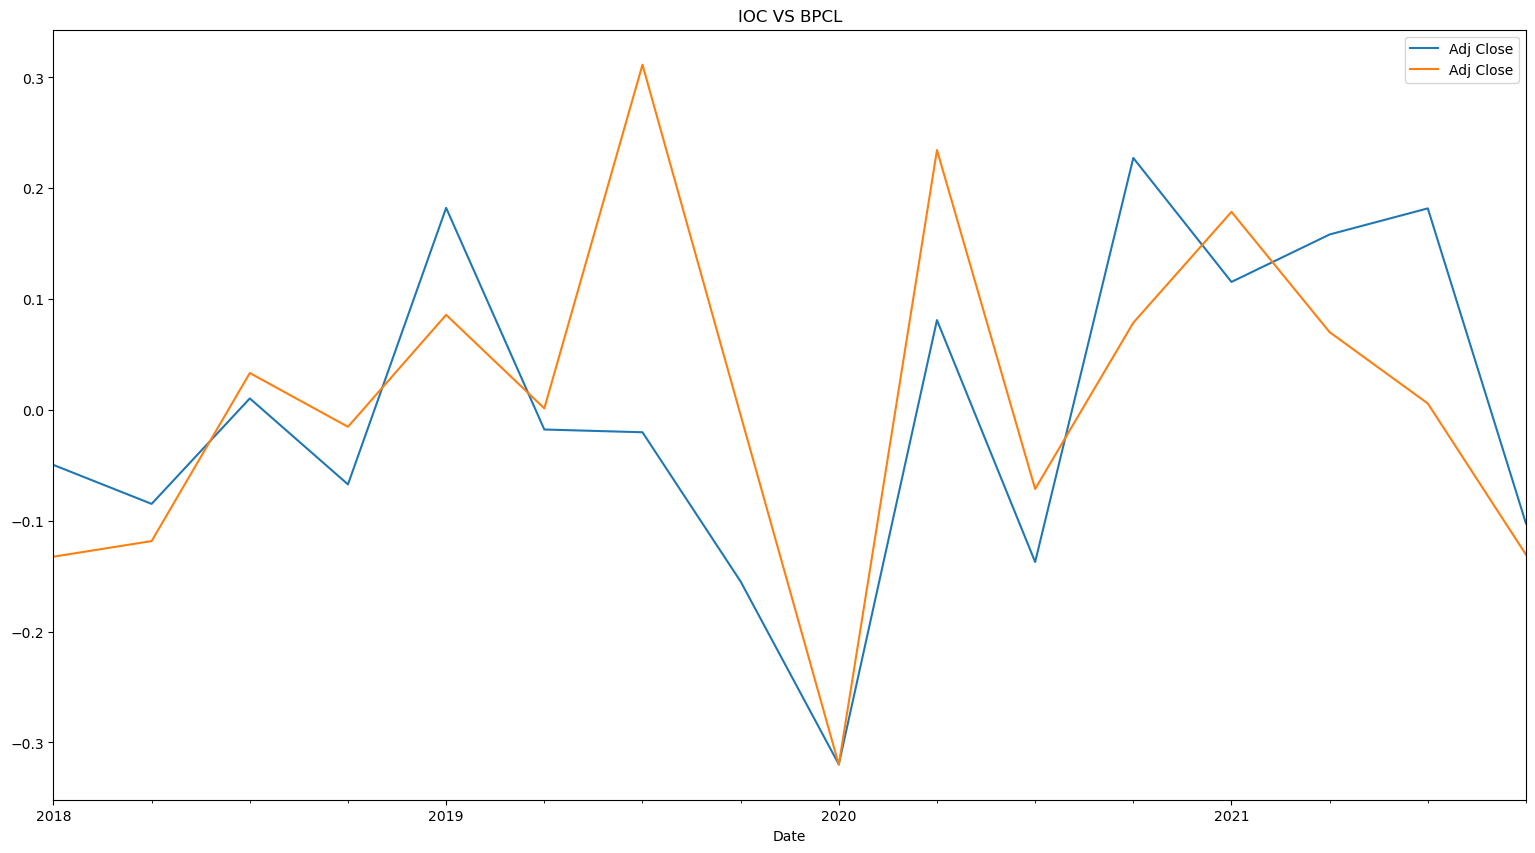

In [86]:
temp2.plot(figsize=(19,10),title='IOC VS BPCL')

# Testing Pairs which are not Correlated

# IOC Stock Details

In [115]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('IOC.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [116]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,185.608871,187.885887,183.269356,185.563307,129.851136,9.715492e+06
2017-06-30,210.881558,213.419261,207.636885,210.163524,150.853799,1.068585e+07
2017-09-30,203.126190,205.941270,199.823809,202.504762,145.526207,9.988499e+06
2017-12-31,202.545161,204.489515,199.897178,201.955243,145.302802,7.851888e+06
2018-03-31,191.285416,193.240833,188.729167,190.732499,140.846749,1.197826e+07
2018-06-30,167.562499,169.870311,164.810157,167.203125,126.224642,1.080866e+07
2018-09-30,158.891802,160.523771,156.754099,158.415574,120.245204,7.341634e+06
2018-12-31,138.123771,140.256557,134.531968,137.363934,105.505685,1.695742e+07
2019-03-31,140.997500,143.198333,138.918334,141.200001,113.151929,1.401721e+07


In [117]:
stock_ops1 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [118]:
stock_ops1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.158786,0.186364,0.156159,0.182012,0.238550,3.375957
2017-06-30,-0.007880,0.007622,0.007789,0.010626,0.010626,-0.291640
2017-09-30,0.033229,0.040811,0.029419,0.035151,0.037585,1.476180
2017-12-31,-0.027401,-0.038462,-0.027003,-0.044275,-0.044275,0.937585
2018-03-31,-0.110513,-0.090191,-0.115830,-0.094243,-0.049630,2.998814
2018-06-30,-0.125913,-0.113726,-0.093695,-0.084776,-0.084776,-0.380356
2018-09-30,-0.020487,-0.019334,-0.005585,-0.002277,0.010389,-0.418300
2018-12-31,-0.094118,-0.103226,-0.089667,-0.109776,-0.067189,0.160076
2019-03-31,0.180758,0.189130,0.176449,0.171387,0.182348,6.250769


# BAJAJ FINANCE Stock Details

In [119]:
start_date=dt.date(2017,1,1)
end_date = dt.date.today()
stock_price= yf.download('BAJFINANCE.NS',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [120]:
stock_price.resample('Q').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,1040.494355,1056.816933,1024.729841,1042.354029,1032.027596,1.234382e+06
2017-06-30,1308.171313,1327.350004,1290.144267,1309.645894,1296.671425,8.239566e+05
2017-09-30,1707.683332,1734.096823,1684.154770,1709.657141,1696.919335,1.207954e+06
2017-12-31,1794.687092,1810.777419,1767.778230,1788.073392,1774.928038,8.876498e+05
2018-03-31,1691.677502,1714.249162,1665.750838,1690.797498,1678.367253,9.828710e+05
2018-06-30,2042.007811,2070.134371,2016.692976,2044.910158,2029.876652,1.309957e+06
2018-09-30,2634.401627,2665.642606,2583.657395,2623.843450,2608.835705,1.870492e+06
2018-12-31,2369.504094,2416.116387,2323.380341,2374.024596,2360.621640,2.686090e+06
2019-03-31,2665.737504,2700.353324,2631.212512,2667.670003,2652.609273,1.399593e+06


In [121]:
stock_ops2 = stock_price.resample('Q').apply(lambda x:(x[-1]/x[0])-1)

In [122]:
stock_ops2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,0.394366,0.359423,0.386580,0.346015,0.346015,-0.500419
2017-06-30,0.168839,0.160639,0.163941,0.161921,0.161921,0.047753
2017-09-30,0.346341,0.348921,0.339444,0.325055,0.328475,1.725478
2017-12-31,-0.059543,-0.057433,-0.045613,-0.059482,-0.059482,-0.541156
2018-03-31,0.009946,0.018750,0.023483,0.024281,0.024281,0.843686
2018-06-30,0.290051,0.271233,0.283550,0.262702,0.262702,1.176902
2018-09-30,-0.029565,-0.028816,-0.071939,-0.057207,-0.055587,3.558788
2018-12-31,0.225530,0.193857,0.284280,0.197713,0.197714,-0.698591
2019-03-31,0.111569,0.126126,0.125550,0.127595,0.127595,0.489254


In [123]:
IOC =stock_ops1.loc['2018':][['Adj Close']]

In [124]:
BAJFINANCE =stock_ops2.loc['2018':][['Adj Close']]

In [125]:
temp3=pd.concat([IOC['Adj Close'],BAJFINANCE['Adj Close']],axis=1).dropna()

<AxesSubplot:title={'center':'IOC VS BAJFINANCE'}, xlabel='Date'>

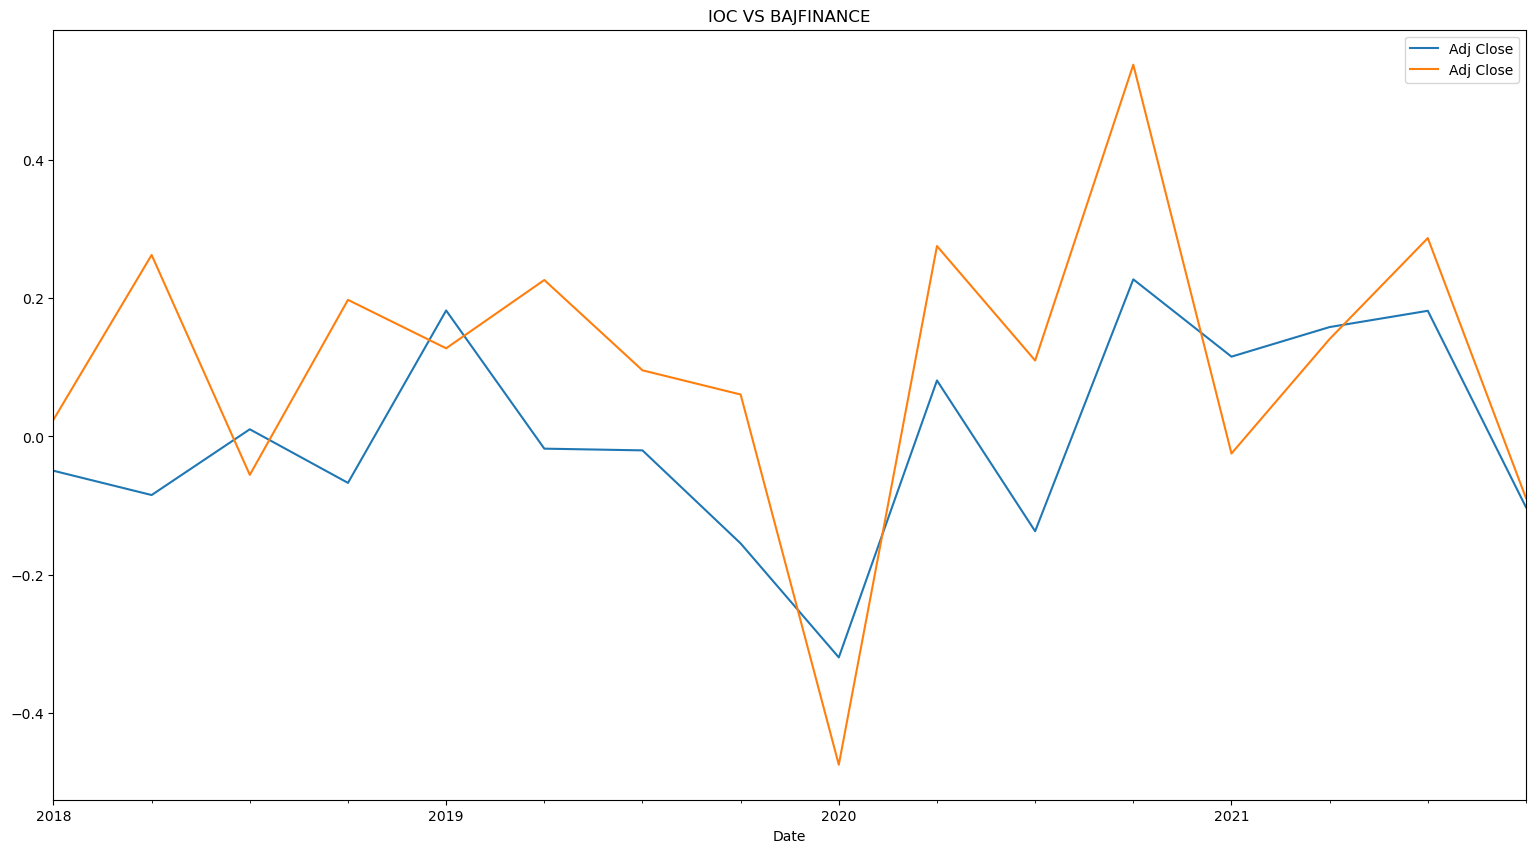

In [126]:
temp3.plot(figsize=(19,10),title='IOC VS BAJFINANCE')

From above Analysis we come to a conclusion that:
1.They is no such Trend or Seasonality in Trading as they vary based on various factors.
2.Simple Moving Average(SMA) gives us idea what will the Stock price be based on past close price data.
3.Exponential Moving Average(EVA) gives us idea how close the Stock price will be to the actual by increasing the weightage on recent close.
4.
5.In Pair Trading Analysis of Nifty 50 stocks we realize that Pairs having Highest rate of correlation belong to the same sector ie.(Banking,Metals etc)